# Extracting features from categorical variables 

### Basic One Hot Encoding

In [1]:
from sklearn.feature_extraction import DictVectorizer
onehot_encoder = DictVectorizer()
instances = [
{'city': 'New York'},
{'city': 'San Francisco'},
{'city': 'Chapel Hill'} ]
print(onehot_encoder.fit_transform(instances).toarray())

[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


# Extracting features from text

## Bag of Words

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
'UNC played Duke in basketball',
'Duke lost the basketball game',
'I ate a sandwich'
]
vectorizer = CountVectorizer()
print(vectorizer.fit_transform(corpus).todense())
print(vectorizer.vocabulary_)

[[0 1 1 0 1 0 1 0 0 1]
 [0 1 1 1 0 1 0 0 1 0]
 [1 0 0 0 0 0 0 1 0 0]]
{'unc': 9, 'played': 6, 'duke': 2, 'in': 4, 'basketball': 1, 'lost': 5, 'the': 8, 'game': 3, 'ate': 0, 'sandwich': 7}


### Calculating Euclidean Distances

In [24]:
from sklearn.metrics.pairwise import euclidean_distances
counts = [
[0, 1, 1, 0, 0, 1, 0, 1],
[0, 1, 1, 1, 1, 0, 0, 0],
[1, 0, 0, 0, 0, 0, 1, 0]
]
print('Distance between 1st and 2nd documents:', euclidean_distances(counts)[0][1])
print('Distance between 1st and 3rd documents:', euclidean_distances(counts)[0][2])
print('Distance between 2nd and 3rd documents:', euclidean_distances(counts)[1][2])
euclidean_distances(counts)

Distance between 1st and 2nd documents: 2.0
Distance between 1st and 3rd documents: 2.449489742783178
Distance between 2nd and 3rd documents: 2.449489742783178


array([[0.        , 2.        , 2.44948974],
       [2.        , 0.        , 2.44948974],
       [2.44948974, 2.44948974, 0.        ]])

### Removing Stop Words

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
'UNC played Duke in basketball',
'Duke lost the basketball game',
'I ate a sandwich'
]
vectorizer = CountVectorizer(stop_words='english')
print(vectorizer.fit_transform(corpus).todense())
print(vectorizer.vocabulary_)

[[0 1 1 0 0 1 0 1]
 [0 1 1 1 1 0 0 0]
 [1 0 0 0 0 0 1 0]]
{'unc': 7, 'played': 5, 'duke': 2, 'basketball': 1, 'lost': 4, 'game': 3, 'ate': 0, 'sandwich': 6}


## Lemmatization and Stemming
#### These sentences are saying the same thing but share no similarities in their feature vectors
##### 'Ate' and 'eaten' have same meaning in these sentences but are counted as unique

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
'He ate the sandwiches',
'Every sandwich was eaten by him'
]
vectorizer = CountVectorizer(binary=True, stop_words='english')
print(vectorizer.fit_transform(corpus).todense())
print(vectorizer.vocabulary_)

[[1 0 0 1]
 [0 1 1 0]]
{'ate': 0, 'sandwiches': 3, 'sandwich': 2, 'eaten': 1}


Lemmatization is the process of determining the lemma; the morphological root, of an inflected word based on its context.

Stemming has a similar goal to lemmatization, but it does not attempt to produce the morphological roots of
words. 

_Instead, stemming removes all patterns of characters that appear to be affixes,
resulting in a token that is not necessarily a valid word. Lemmatization frequently
requires a lexical resource, like WordNet, and the word's part of speech. Stemming
algorithms frequently use rules instead of lexical resources to produce stems and can
operate on any token, even without its context._

In [31]:
import nltk

#### The first sentence uses gather as a present verb, the second uses gathering as a noun

In [32]:
corpus = [
 'I am gathering ingredients for the sandwich.',
 'There were many wizards at the gathering.'
]

### Lemmatizing finds the morphological root

In [34]:
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize('gathering', 'v'))
print(lemmatizer.lemmatize('gathering', 'n'))

gather
gathering


### Stemming simply removes affixes

In [35]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
print(stemmer.stem('gathering'))

gather


In [36]:
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag

wordnet_tags = ['n', 'v']
corpus = [
'He ate the sandwiches',
'Every sandwich was eaten by him'
]

stemmer = PorterStemmer()
print('Stemmed:', [[stemmer.stem(token) for token in word_tokenize(document)] for document in corpus])

def lemmatize(token, tag):
  if tag[0].lower() in ['n', 'v']:
    return lemmatizer.lemmatize(token, tag[0].lower())
  return token

lemmatizer = WordNetLemmatizer()
tagged_corpus = [pos_tag(word_tokenize(document)) for document in corpus]
print('Lemmatized:', [[lemmatize(token, tag) for token, tag in document] for document in tagged_corpus])


Stemmed: [['He', 'ate', 'the', 'sandwich'], ['everi', 'sandwich', 'wa', 'eaten', 'by', 'him']]
Lemmatized: [['He', 'eat', 'the', 'sandwich'], ['Every', 'sandwich', 'be', 'eat', 'by', 'him']]


## TF-IDF

##### Term Frequency - Inverse Document Frequency

#### (# of times term occurs in document * (# of documents in corpus / # of documents with term))

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = ['The dog ate a sandwich, the wizard transfigured a sandwich, and I ate a sandwich']
vectorizer = CountVectorizer(stop_words='english')
print(vectorizer.fit_transform(corpus).todense())
print(vectorizer.vocabulary_)

[[2 1 3 1 1]]
{'dog': 1, 'ate': 0, 'sandwich': 2, 'wizard': 4, 'transfigured': 3}


In [41]:
 from sklearn.feature_extraction.text import TfidfVectorizer
 corpus = [
 'The dog ate a sandwich and I ate a sandwich',
 'The wizard transfigured a sandwich'
 ]
 vectorizer = TfidfVectorizer(stop_words='english')
 print(vectorizer.fit_transform(corpus).todense())
print(vectorizer.vocabulary_)

[[0.75458397 0.37729199 0.53689271 0.         0.        ]
 [0.         0.         0.44943642 0.6316672  0.6316672 ]]
{'dog': 1, 'ate': 0, 'sandwich': 2, 'wizard': 4, 'transfigured': 3}


### Space-efficient feature vectorizing with the hashing trick
_In this chapter's previous examples, a dictionary containing all of the corpus's unique
tokens is used to map a document's tokens to the elements of a feature vector.
Creating this dictionary has two drawbacks. First, two passes are required over the
corpus: the first pass is used to create the dictionary and the second pass is used to
create feature vectors for the documents. Second, the dictionary must be stored in
memory, which could be prohibitive for large corpora. It is possible to avoid creating
this dictionary through applying a hash function to the token to determine its index
in the feature vector directly. This shortcut is called the hashing trick. The following
example uses HashingVectorizer to demonstrate the hashing trick:_

In [42]:
from sklearn.feature_extraction.text import HashingVectorizer
corpus = ['the', 'ate', 'bacon', 'cat']
vectorizer = HashingVectorizer(n_features=6)
print(vectorizer.transform(corpus).todense())

[[-1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0.  0.]]


_The hashing trick is stateless. It can be used to create feature vectors in both parallel
and online, or streaming, applications because it does not require an initial pass over
the corpus.. Note that n_features is an optional keyword argument. Its default value, 20 2 , is adequate for most problems; it is set to 6 here so that the matrix will be small
enough to print and still display all of the nonzero features. Also, note that some of the
term frequencies are negative. Since hash collisions are possible, HashingVectorizer
uses a signed hash function. The value of a feature takes the same sign as its token's
hash; if the term cats appears twice in a document and is hashed to -3, the fourth
element of the document's feature vector will be decremented by two. If the term
dogs also appears twice and is hashed to 3, the fourth element of the feature vector
will be incremented by two. Using a signed hash function creates the possibility that
errors from hash collisions will cancel each other out rather than accumulate; a loss
of information is preferable to a loss of information and the addition of spurious
information. Another disadvantage of the hashing trick is that the resulting model
is more difficult to inspect, as the hashing function cannot recall what input token is
mapped to each element of the feature vector._

# Extracting features from images

In [43]:
from sklearn import datasets
digits = datasets.load_digits()
print('Digit:', digits.target[0])
print(digits.images[0])
print('Feature vector:\n', digits.images[0].reshape(-1, 64))

Digit: 0
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
Feature vector:
 [[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]]


This representation can be effective for some basic tasks, like recognizing printed
characters. However, recording the intensity of every pixel in the image produces
prohibitively large feature vectors. A tiny 100 x 100 grayscale image would require
a 10,000-dimensional vector, and a 1920 x 1080 grayscale image would require a
2,073,600-dimensional vector. Unlike the TF-IDF feature vectors we created, in most
problems these vectors are not sparse. Space-complexity is not the only disadvantage
of this representation; learning from the intensities of pixels at particular locations
results in models that are sensitive to changes in the scale, rotation, and translation
of images. A model trained on our basic feature representations might not be able
to recognize the same zero if it were shifted a few pixels in any direction, enlarged,
or rotated a few degrees. Furthermore, learning from pixel intensities is itself
problematic, as the model can become sensitive to changes in illumination. For
these reasons, this representation is ineffective for tasks that involve photographs
or other natural images. 

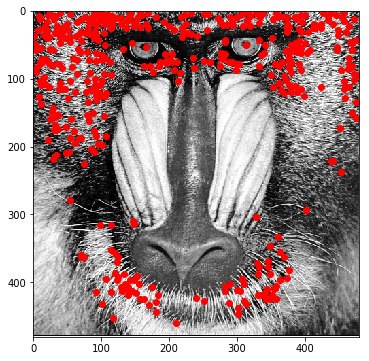

In [48]:
import numpy as nps
from skimage.feature import corner_harris, corner_peaks
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import skimage.io as io
from skimage.exposure import equalize_hist

def show_corners(corners, image):
    fig = plt.figure()
    plt.gray()
    plt.imshow(image)
    y_corner, x_corner = zip(*corners)
    plt.plot(x_corner, y_corner, 'or')
    plt.xlim(0, image.shape[1])
    plt.ylim(image.shape[0], 0)
    fig.set_size_inches(np.array(fig.get_size_inches()) * 1.5)
    plt.show()
  
mandrill = io.imread('mandrill.png')
mandrill = equalize_hist(rgb2gray(mandrill))
corners = corner_peaks(corner_harris(mandrill), min_distance=2)
show_corners(corners, mandrill)

The following figure plots the extracted points of interest. Of the image's 230400
pixels, 466 were extracted as points of interest. This representation is much more
compact; ideally, there is enough variation proximal to the points of interest to
reproduce them despite changes in the image's illumination.

# Data standardization

In [49]:
from sklearn import preprocessing
import numpy as np
X = np.array([
[0., 0., 5., 13., 9., 1.],
[0., 0., 13., 15., 10., 15.],
[0., 3., 15., 2., 0., 11.]
])
print(preprocessing.scale(X))

[[ 0.         -0.70710678 -1.38873015  0.52489066  0.59299945 -1.35873244]
 [ 0.         -0.70710678  0.46291005  0.87481777  0.81537425  1.01904933]
 [ 0.          1.41421356  0.9258201  -1.39970842 -1.4083737   0.33968311]]


In [50]:
np.mean(X)

6.222222222222222

In [53]:
np.std(X)

6.0420338330322325